# Countries of the World EDA - Assignment 1

## Abstract

In this assignment, we investigate the different kinds of facts in countries of the world including GDP, literacy, phones and so on, and in the end trying to training a model which can predict countries GDP. First of all, we will take a glance to the original data which provide by US government and category them into some subtopics in order to help us understand these data and let us easier to process them for the later on prediction. The tables of these data will be first presented, then, we will use some charts trying to understand the relationship between them.
We will investigate some countries which have higher GDP, then, research the relation between region versus GDP, and the rate of literacy and agriculture. The correlation of the facts will also be researched, which will be plotted as color table. The scatterplot of GDP versus others facts are shown latter on.

## Investigation

We need to import the libraries we need in later investigation.

In [70]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

Then, load the data we want to investigate.

In [71]:
# importing the dataset
df=pd.read_csv("COTW.csv", decimal = ',')

We first take a peek of the data we read in as listing first five observations. It seems list by the alpha order (first five are ‘A’). And the features are showing in the row too.

In [72]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


The above shows the data by row, now we take a look into column data, on the other words, the statistical relationship, maximum, minimum, mean, standard,  and so on, between features in every countries. 

In [73]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


Then, because we want to predict GDP, so it is worthy to know the top GDP countries in these data. So, we sort them by GDP descending. As you can see, the highest GDP country is Luxembourg, then is Norway.

In [74]:
top_gdp_countries = df.sort_values('GDP ($ per capita)',ascending=False)
# Look at top 20
top_gdp_countries[['GDP ($ per capita)','Country']].head(20)

,GDP ($ per capita),Country
121,55100.0,Luxembourg
154,37800.0,Norway
214,37800.0,United States
22,36000.0,Bermuda
38,35000.0,Cayman Islands
177,34600.0,San Marino
196,32700.0,Switzerland
54,31100.0,Denmark
93,30900.0,Iceland
12,30000.0,Austria


Then, we show the above sorted result as the histogram.

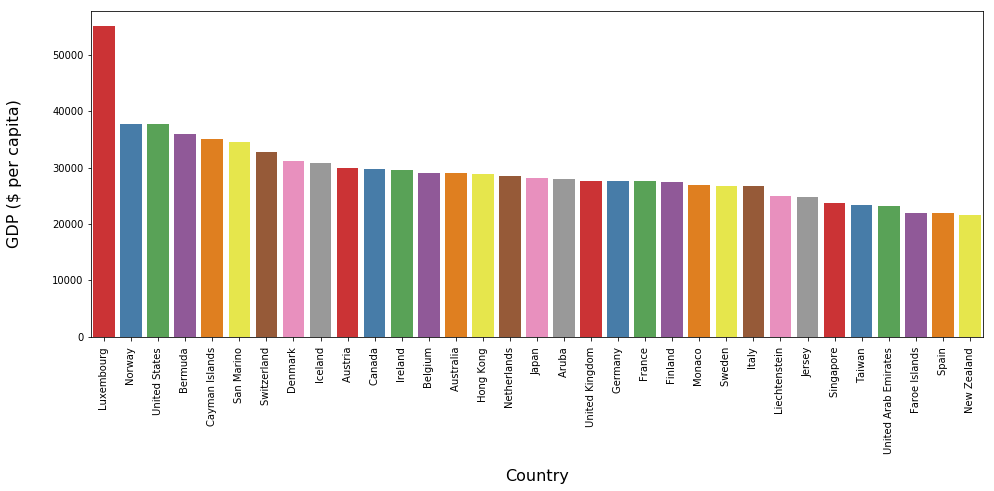

In [75]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.head(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

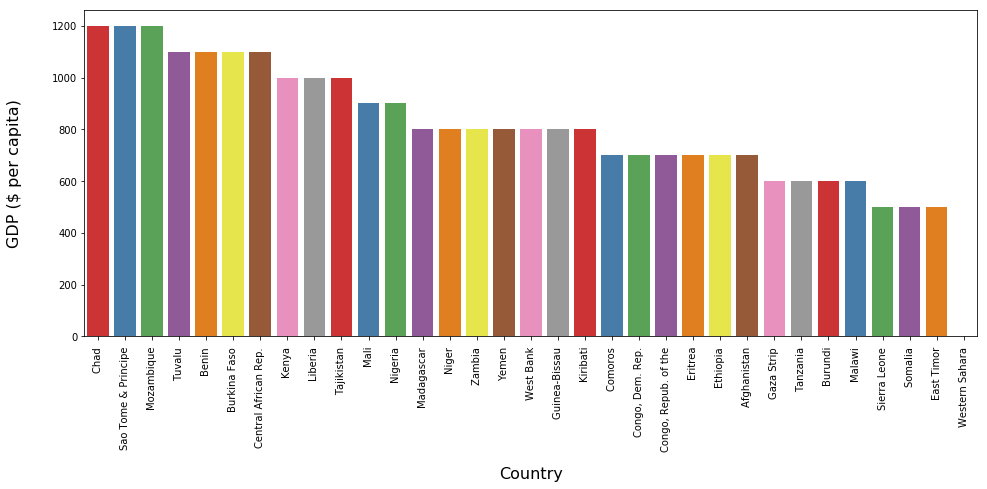

In [76]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.tail(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

It’s important that find out whether or not there is a null value in our data because it may cause difficulty of our numerical analysis. So, we calculate how many null value in each column and also find out how many percentage in all of our observations. 

In [77]:
total = df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent
Climate,22,9.69
Literacy (%),18,7.93
Industry,16,7.05
Service,15,6.61
Agriculture,15,6.61
Deathrate,4,1.76
Phones (per 1000),4,1.76
Birthrate,3,1.32
Infant mortality (per 1000 births),3,1.32
Net migration,3,1.32


In [78]:
df.isnull().values.any()

True

The table below shows the summary of how many null are there in every observations.

In [79]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

The total null is 110.

In [80]:
df.isnull().sum().sum()

110

## Region

The countries’ GDP may also cause by the region it locates, so we gather these countries by region groups, there are eleven groups out there. Then, we investigate the median of GDP, literacy and agriculture of these countries.

In [81]:
df.groupby('Region')[['GDP ($ per capita)', 'Literacy (%)', 'Agriculture']].median()


,GDP ($ per capita),Literacy (%),Agriculture
Region,,,
ASIA (EX. NEAR EAST),3450.0,90.60,0.1610
BALTICS,11400.0,99.80,0.0400
C.W. OF IND. STATES,3450.0,99.05,0.1980
EASTERN EUROPE,9100.0,98.60,0.0815
LATIN AMER. & CARIB,6300.0,94.05,0.0700
NEAR EAST,9250.0,83.00,0.0350
NORTHERN AFRICA,6000.0,70.00,0.1320
NORTHERN AMERICA,29800.0,97.50,0.0100
OCEANIA,5000.0,95.00,0.1505


Then, we plot the box digram of GDP and literacy rate to show the distribution in all range.

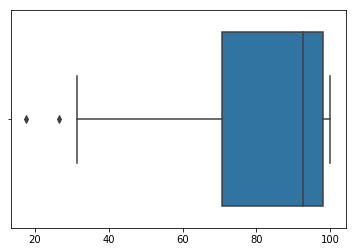

In [82]:
sns.boxplot(np.array(df['Literacy (%)']))


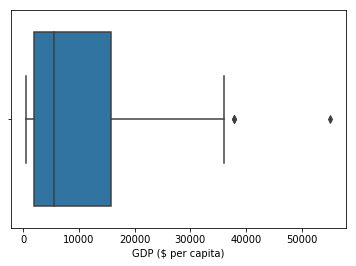

In [83]:
sns.boxplot(df['GDP ($ per capita)'])

We calculate the correlation between each features. It is interested that GDP is relatively independent on infant mortality and birth rate, but is relatively dependent on phone rate. We can say that if a country’s economic is in a good condition, people there may afford to buy cell phone.

In [84]:
df.corr()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Population,1.000000,0.469985,-0.028190,-0.068199,0.000011,0.023003,-0.039324,-0.043481,-0.030819,0.188251,-0.060757,-0.120606,-0.026546,-0.045090,-0.028367,0.000376,0.099333,-0.080852
Area (sq. mi.),0.469985,1.000000,-0.066917,-0.095627,0.047470,-0.007163,0.072185,0.035994,0.053403,-0.079714,-0.143916,0.138974,-0.117134,-0.066423,0.040079,-0.050640,0.121565,-0.054369
Pop. Density (per sq. mi.),-0.028190,-0.066917,1.000000,0.241690,0.178038,-0.144238,0.195773,0.097230,0.280172,-0.081015,-0.031661,0.081859,0.009064,-0.159192,-0.070045,-0.107142,-0.139803,0.248774
Coastline (coast/area ratio),-0.068199,-0.095627,0.241690,1.000000,-0.134145,-0.136577,0.049118,0.117095,0.152129,-0.120772,0.341820,-0.079494,-0.032579,-0.075765,-0.161866,-0.030250,-0.199995,0.196528
Net migration,0.000011,0.047470,0.178038,-0.134145,1.000000,-0.025015,0.382461,-0.008761,0.239601,-0.058170,-0.347968,0.225299,-0.015170,-0.066537,0.033611,-0.116719,-0.026324,0.127134
Infant mortality (per 1000 births),0.023003,-0.007163,-0.144238,-0.136577,-0.025015,1.000000,-0.600774,-0.765536,-0.672312,-0.113859,-0.062366,0.124100,-0.374406,0.845764,0.656338,0.709475,0.003322,-0.633982
GDP ($ per capita),-0.039324,0.072185,0.195773,0.049118,0.382461,-0.600774,1.000000,0.513144,0.834499,0.019768,-0.219229,0.097828,0.340791,-0.650137,-0.201661,-0.586769,-0.028926,0.550216
Literacy (%),-0.043481,0.035994,0.097230,0.117095,-0.008761,-0.765536,0.513144,1.000000,0.601935,0.105021,0.042825,-0.107563,0.392081,-0.790846,-0.393946,-0.609638,0.064733,0.494607
Phones (per 1000),-0.030819,0.053403,0.280172,0.152129,0.239601,-0.672312,0.834499,0.601935,1.000000,0.061022,-0.152420,0.029900,0.402161,-0.724614,-0.260309,-0.601739,-0.152452,0.683934
Arable (%),0.188251,-0.079714,-0.081015,-0.120772,-0.058170,-0.113859,0.019768,0.105021,0.061022,1.000000,0.094361,-0.856763,0.380031,-0.186823,0.053472,-0.034822,-0.063618,0.091126


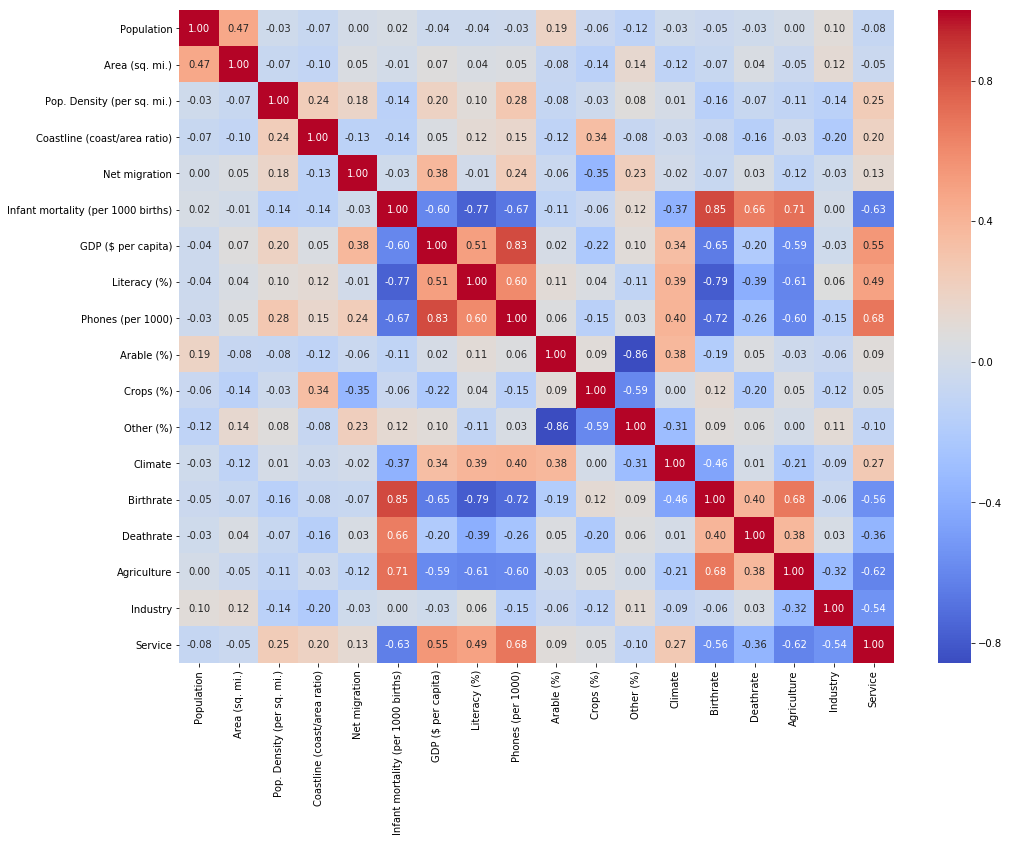

In [85]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

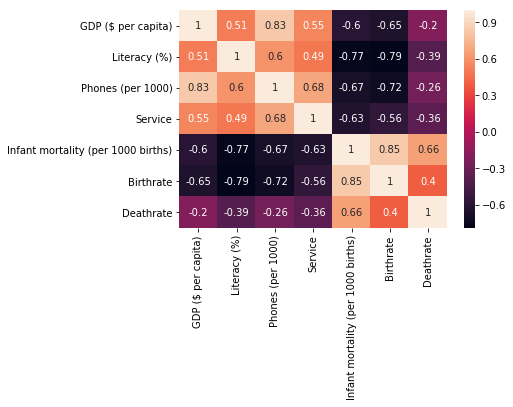

In [86]:
# choose attributes which shows relation
x = df[['GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Service','Infant mortality (per 1000 births)','Birthrate','Deathrate']]
# show corr of the same
sns.heatmap(x.corr(), annot=True)

Then, we plot the scatterplot for the GDP versus others parameters for all the countries and also indicate the correlation between GDP and the parameter. We can clear see that, for most of the countries, the phone rate is proportional to GDP. The net migration, crops, and death rate are relatively independent to GDP.

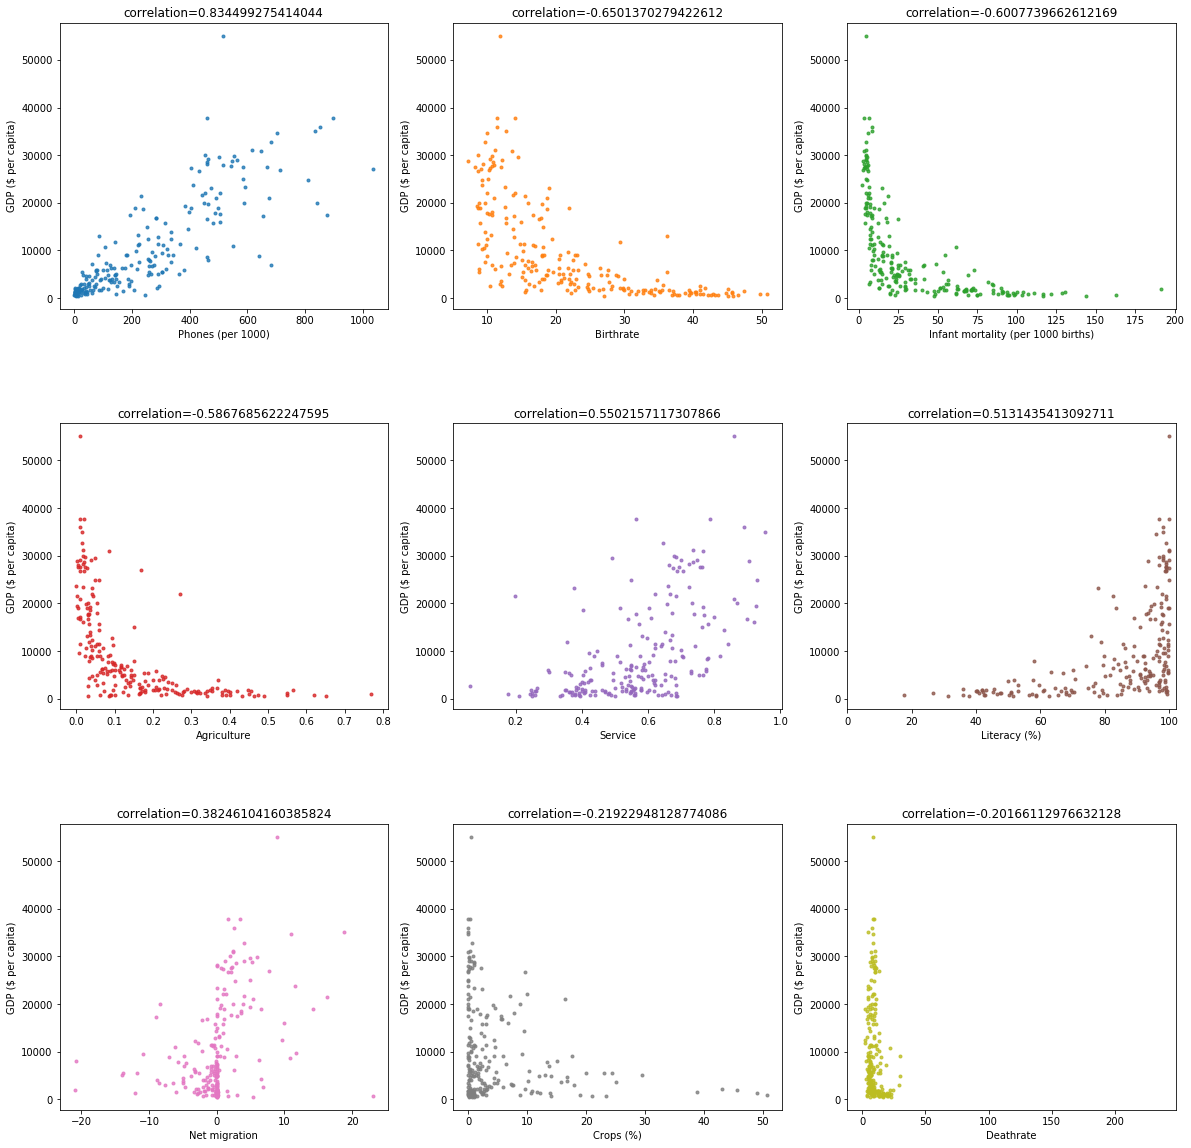

In [87]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in df.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Climate')):
        corr_to_gdp[col] = df['GDP ($ per capita)'].corr(df[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(3):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=df,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

In the below table, we calculate the median of GDP, Phones (per 1000), Service by region.

In [88]:
df.groupby('Region')[['GDP ($ per capita)', 'Phones (per 1000)', 'Service']].median()

,GDP ($ per capita),Phones (per 1000),Service
Region,,,
ASIA (EX. NEAR EAST),3450.0,61.50,0.4950
BALTICS,11400.0,321.40,0.6660
C.W. OF IND. STATES,3450.0,155.35,0.4595
EASTERN EUROPE,9100.0,296.05,0.5910
LATIN AMER. & CARIB,6300.0,222.85,0.6180
NEAR EAST,9250.0,211.00,0.5840
NORTHERN AFRICA,6000.0,123.60,0.4255
NORTHERN AMERICA,29800.0,683.20,0.7870
OCEANIA,5000.0,118.60,0.6440


When we are trying to execute the code below the error pop up. The error message shows that we have the problems with data value.

ZeroDivisionError: 0.0 cannot be raised to a negative power

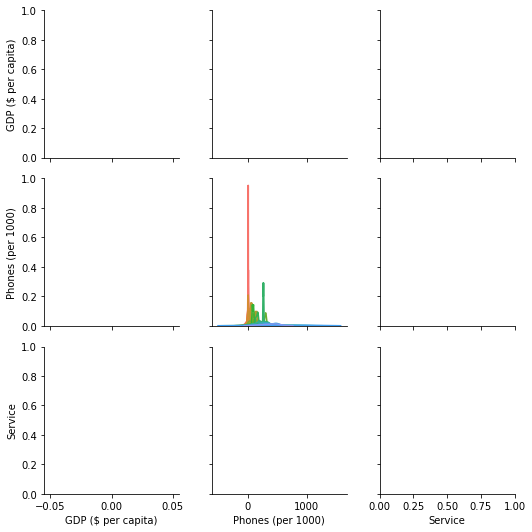

In [89]:
# choose attributes which shows relation
x = df[['GDP ($ per capita)','Phones (per 1000)','Service']]
sns.pairplot(x, hue="GDP ($ per capita)")

Then, we try to execute the other plotting command. The error message shows us that we have some NaN value in our data. So, we have to eliminate the NaN value.

ValueError: cannot convert float NaN to integer

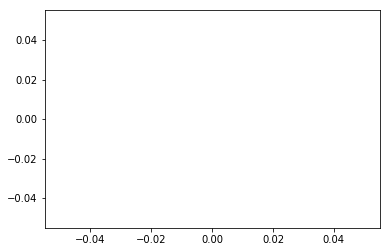

In [90]:
#checking distribution of literacy of the world
sns.distplot(np.array(df['GDP ($ per capita)']))

In [91]:
for col in df.columns.values:
    if df[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = df.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = df.groupby('Region')[col].median()
    for region in df['Region'].unique():
        df[col].loc[(df[col].isnull())&(df['Region']==region)] = guess_values[region]

After we eliminate the NaN value, we can briefly check by the code below.

In [99]:
df.isnull().sum().sum()

0

After we eliminate the NaN value, we can successfully plot the digrams, as showing below.

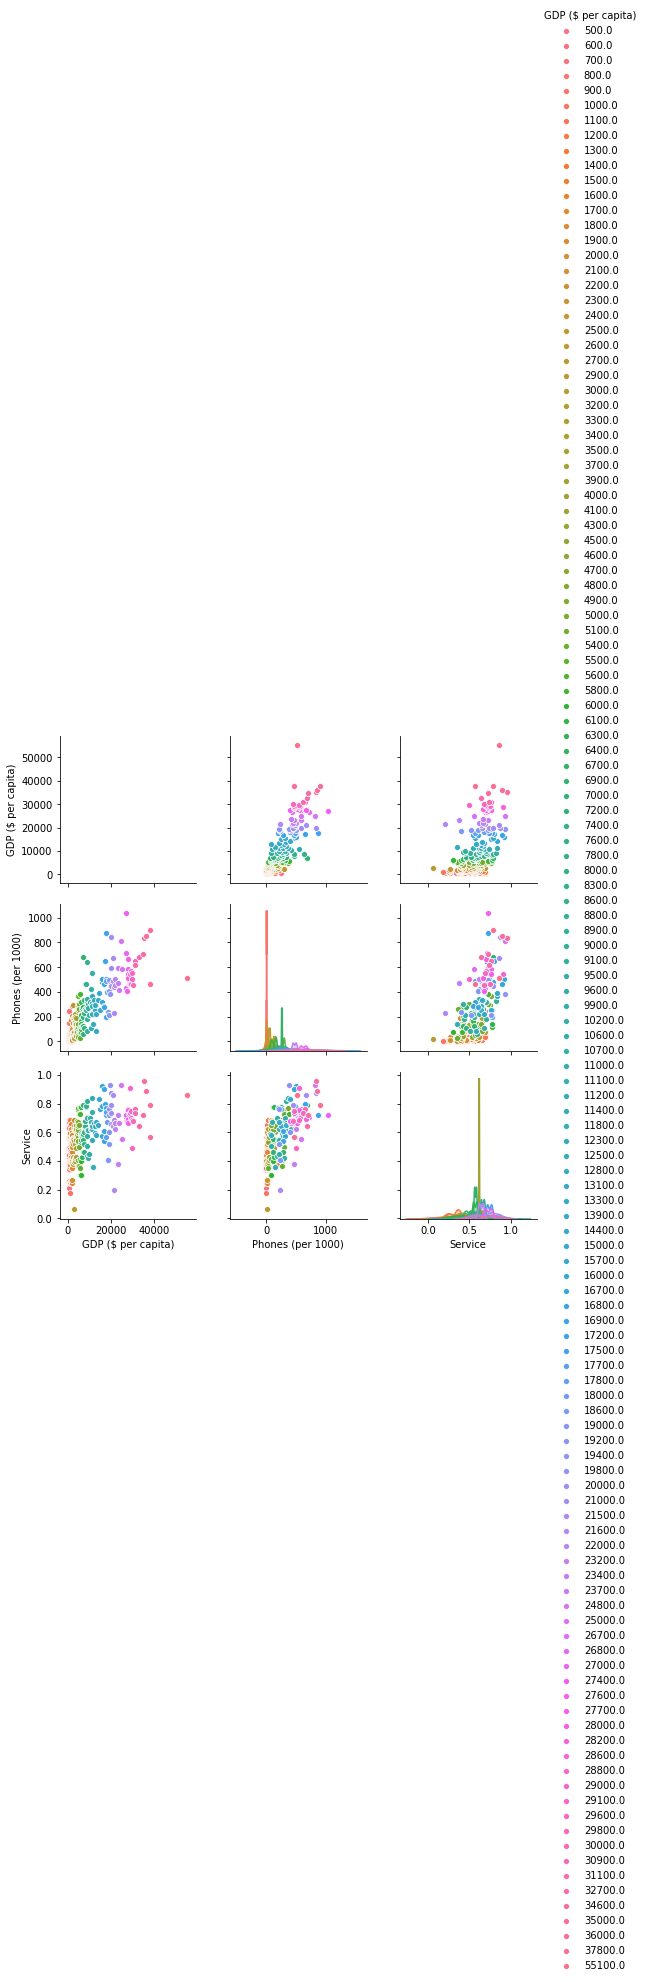

In [92]:
# choose attributes which shows relation
x = df[['GDP ($ per capita)','Phones (per 1000)','Service']]
sns.pairplot(x, hue="GDP ($ per capita)")

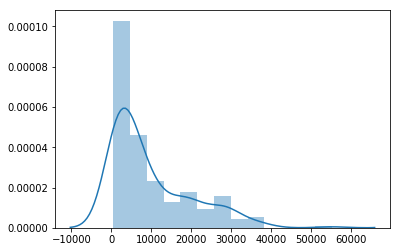

In [93]:
#checking distribution of literacy of the world
sns.distplot(np.array(df['GDP ($ per capita)']))

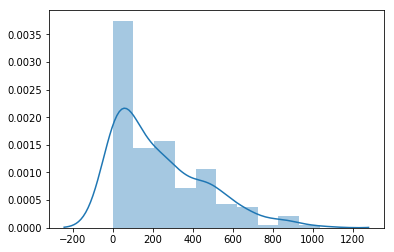

In [94]:
#checking distribution of literacy of the world
sns.distplot(np.array(df['Phones (per 1000)']))

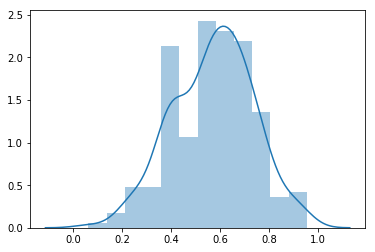

In [95]:
sns.distplot(np.array(df['Service']))

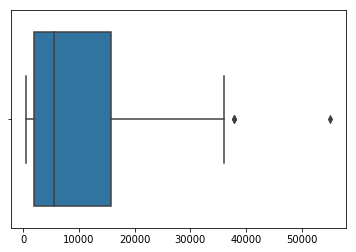

In [96]:
sns.boxplot(np.array(df['GDP ($ per capita)']))

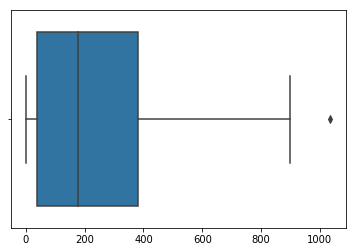

In [97]:
sns.boxplot(np.array(df['Phones (per 1000)']))

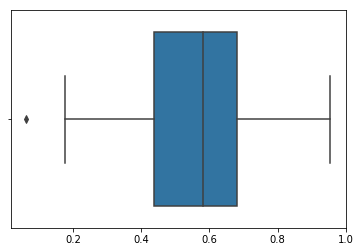

In [98]:
sns.boxplot(np.array(df['Service']))
